In [1]:
%matplotlib inline
### Interactive medword testing tool ###

import preprocess as pp
import embedding
import model_validation as mv
import pylab
import json
import shared.load_config 
import os
import word2vec as w2v

In [2]:
### define filepaths and names ###

# where to get the configuration file corresponding to the embedding model
config_data_dir = ''
config_filename = 'configuration.json'


# where to get the trained embedding model
emb_model_dir = 'data/embeddings/'
emb_model_filename = 'emb_model_1206.bin'
emb_model_src = os.path.join(emb_model_dir, emb_model_filename)


# Load configuration (don't change)
config_src = os.path.join(config_data_dir, config_filename)
config = shared.load_config.Configuration(config_src)

In [ ]:
### Validation of the embedding model ###

# where to get the validation data
config.config['val_data_dir'] = 'data/validation_data/'

# Choose DOESNTFIT test file from your validation folder
# note: - the doesntfit file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 word_3 ... word_N word_not_fitting
#        
#         -> word_1 to word_N belong to a category but word_not_fitting doesn't
# 
#         Example question:
# 
#         Auto Motorrad Fahrrad Fußgänger
#
#
config.config['doesntfit_file'] = 'german_doesntfit1.txt'


# Choose SYNONYM test file from your validation folder
# note: - the synonym file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 
#        
#         -> word_1 and word_N are synonyms
# 
#         Example question:
# 
#         Blutgerinnsel Thrombus
#
# 
config.config['synonyms_file'] = 'german_synonyms3.txt'


model = mv.validate_model(emb_model_src, config)

In [ ]:
### test your used tokenizer ###

tokenizer = pp.get_tokenizer(config)
example = """!! „asdf“ 'asdf' "asdf" ??Ein Arzt bzw. eine Ärztin ist ein medizinisch\n \n 
             ausgebildeter Heilkundiger, beschäftigt sich mit der
             Vorbeugung (Prävention), [Erkennung] (Diagnose),
             Behandlung (Therapie) [...] und Nachsorge von Krankheiten
             und Leiden bzw. gesundheitlichen Beeinträchtigungen,
             und stellt sich damit in den Dienst der Gesundheit."""
             
tk_example = tokenizer.tokenize(str(example))

print(tk_example)

In [ ]:
### Get model information ###
print("vocab_size:", model.vocab.size)  # note that the token '</s>' is 
                                        # always added to the model
    
print("vectors_shape:", model.vectors.shape)


In [ ]:
### Play with model ###

# define a word from which you like to see it's n-nearest neighbours 
# in the embedding space
word = 'arzt'
n_nearest_neighbours = 10

# create list of neighbours
indexes, metrics = model.cosine(word, n_nearest_neighbours)
model.generate_response(indexes, metrics).tolist()

In [ ]:
# Get a vector of a word
vec1 = model['arzt'] 
# or
vec2 = model.get_vector('arzt')

print(vec1[:10])

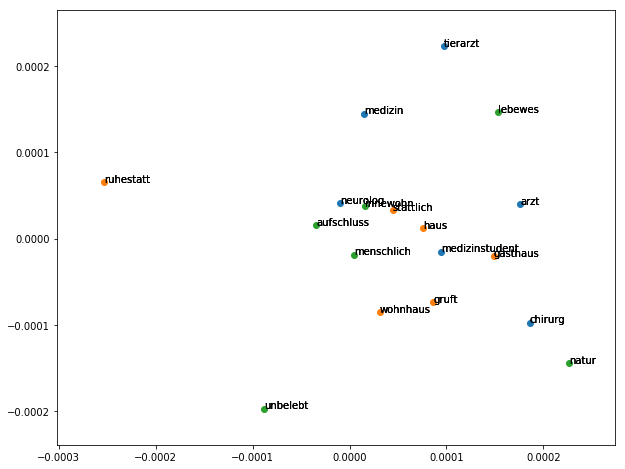

In [4]:
### Visualization ###
# From a list of words, plot all words and it's neighbours 

# define the words you would like to visualize
word_list = ['arzt', 'haus', 'natur']

# define the number of closest neighbors to display per word
n_nearest_neighbours = 5

# change figure size if desired
width = 10.0
height = 8.0
pylab.rcParams['figure.figsize'] = (width, height)

# plotting
mv.visualize_words(model, word_list, n_nearest_neighbours)


In [3]:
### Load model separately if desired ###
model = w2v.load(emb_model_src)